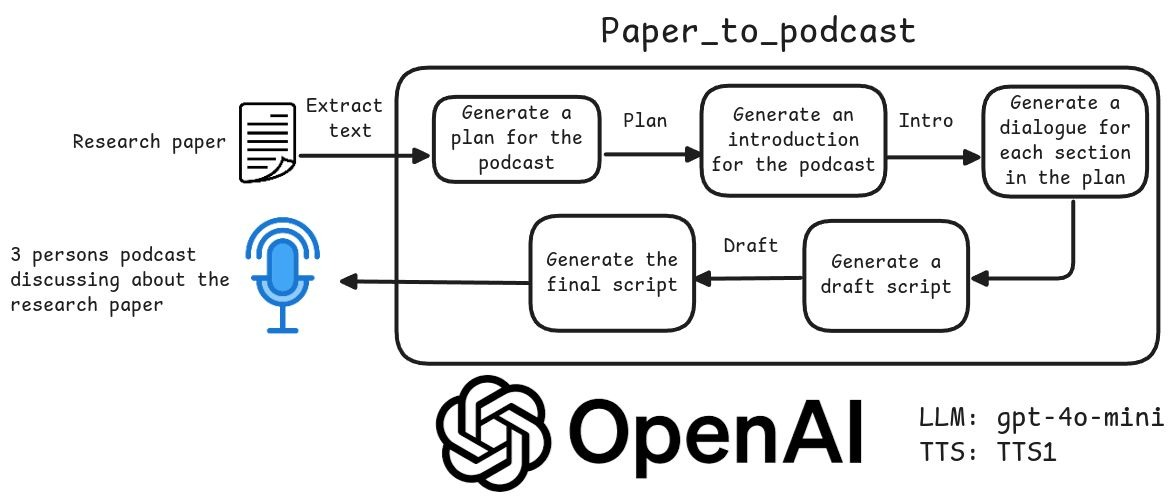

In [1]:
!pip install langchain langchain_core langchain_community langgraph langchain_openai

In [2]:
!pip install chroma langchain_chroma

In [3]:
import getpass
import os

if "OPENAI_API_KEY" not in os.environ:
    os.environ["OPENAI_API_KEY"] = getpass.getpass("Enter your OpenAI API key: ")

Enter your OpenAI API key: ··········


In [4]:
from pydantic import BaseModel, Field
from typing import List

class IntroSegment(BaseModel):
    title: str = Field(..., description="Title of the introduction segment.")
    welcome_message: str = Field(..., description="Personalized welcome for the audience, setting the tone.")
    episode_objective: str = Field(..., description="Clear statement of the episode's objective or goal.")
    host_personal_notes: str = Field(..., description="Personal anecdotes or notes from the host to establish connection.")
    teaser_highlights: List[str] = Field(..., description="List of key topics or moments to excite the audience for the episode.")

class KeyTopic(BaseModel):
    title: str = Field(..., description="Title of the key topic being discussed.")
    introduction: str = Field(..., description="Introduction to the topic, providing necessary background information.")
    arguments: List[str] = Field(..., description="Detailed arguments or points of discussion.")
    data_points: List[str] = Field(..., description="Relevant data, statistics, or factual information to support arguments.")
    examples: List[str] = Field(..., description="Examples, stories, or anecdotes that illustrate the topic.")
    audience_takeaways: str = Field(..., description="Key takeaways or insights for the audience.")

class PanelDiscussionSegment(BaseModel):
    segment_title: str = Field(..., description="Title of the panel discussion segment.")
    panelists: List[str] = Field(..., description="List of names of the panelists participating.")
    key_questions: List[str] = Field(..., description="List of questions posed to the panel.")
    opposing_views: List[str] = Field(..., description="Opposing perspectives or debates addressed during the panel.")
    guest_highlights: List[str] = Field(..., description="Key insights or memorable moments contributed by the panelists.")

class DeepDiveSegment(BaseModel):
    title: str = Field(..., description="Title of the deep dive segment.")
    key_topics: List[KeyTopic] = Field(..., description="List of key topics covered in this segment.")
    expert_analysis: str = Field(..., description="Detailed analysis or perspectives provided by the host or guest.")
    follow_up_questions: List[str] = Field(..., description="List of follow-up questions posed to further explore the topic.")
    audience_reflections: str = Field(..., description="Questions or challenges posed to the audience to encourage reflection.")

class GuestIntroduction(BaseModel):
    name: str = Field(..., description="Full name of the guest.")
    professional_background: str = Field(..., description="Summary of the guest's professional journey.")
    notable_achievements: List[str] = Field(..., description="Significant milestones or achievements of the guest.")
    discussion_purpose: str = Field(..., description="Reason for featuring the guest in this episode and their expected contributions.")

class StoryElement(BaseModel):
    title: str = Field(..., description="Title of the story or anecdote.")
    narrative: str = Field(..., description="Full narrative of the story.")
    emotional_highs: List[str] = Field(..., description="Key emotional moments or impactful details in the story.")
    resolution: str = Field(..., description="How the story resolves or the lessons learned.")
    connection_to_episode: str = Field(..., description="Explanation of how the story ties into the episode's main themes.")

class StorytellingSegment(BaseModel):
    title: str = Field(..., description="Title of the storytelling segment.")
    stories: List[StoryElement] = Field(..., description="List of detailed stories included in this segment.")
    key_messages: List[str] = Field(..., description="List of messages or morals extracted from the stories.")

class InteractiveActivity(BaseModel):
    title: str = Field(..., description="Title of the interactive activity.")
    detailed_description: str = Field(..., description="Detailed explanation of the activity.")
    questions_for_audience: List[str] = Field(..., description="List of interactive questions posed to the audience.")
    guest_participation: str = Field(..., description="Role of the guest in the interactive activity.")
    expected_outcomes: str = Field(..., description="Expected outcomes or reactions from the audience.")

class CallToAction(BaseModel):
    message: str = Field(..., description="Specific call to action directed at the audience.")
    actions: List[str] = Field(..., description="List of specific actions the audience is encouraged to take.")
    relevance: str = Field(..., description="Explanation of how the call to action connects to the episode's themes.")

class Advertisement(BaseModel):
    sponsor_name: str = Field(..., description="Name of the sponsor.")
    advertisement_message: str = Field(..., description="Complete advertisement script.")
    unique_offer: str = Field(..., description="Details of any exclusive offers or promotions.")
    call_to_action: CallToAction = Field(..., description="Call to action associated with the advertisement.")

class Transition(BaseModel):
    phrase: str = Field(..., description="Phrase or sentence used to transition smoothly between segments.")
    bridging_content: str = Field(..., description="Content used to connect two segments meaningfully.")
    tone_shift: str = Field(..., description="Explanation of any tonal shift during the transition.")

class OutroSegment(BaseModel):
    episode_summary: str = Field(..., description="Summary of the entire episode's content.")
    host_final_thoughts: str = Field(..., description="Final thoughts or reflective statements from the host.")
    guest_final_message: str = Field(..., description="Final message or key insight provided by the guest.")
    audience_gratitude: str = Field(..., description="Thank-you message directed at the audience.")
    upcoming_teaser: str = Field(..., description="Preview of the next episode or upcoming content.")

class Section(BaseModel):
    title: str = Field(..., description="Title of the section.")
    storytelling: StorytellingSegment = Field(..., description="The storytelling segment within this section.")
    deep_dive: DeepDiveSegment = Field(..., description="The deep dive segment for this section.")
    interactive_activity: InteractiveActivity = Field(..., description="Interactive activity designed for this section.")
    panel_discussion: PanelDiscussionSegment = Field(..., description="Panel discussion within this section.")

class EpisodeScript(BaseModel):
    intro: IntroSegment = Field(..., description="Introduction segment for the episode.")
    sections: List[Section] = Field(..., description="Detailed list of all sections in the episode.")
    advertisements: List[Advertisement] = Field(..., description="Advertisements integrated into the episode.")
    transitions: List[Transition] = Field(..., description="Transitions connecting different sections.")
    outro: OutroSegment = Field(..., description="Closing segment for the episode.")

class Metadata(BaseModel):
    episode_title: str = Field(..., description="Title of the episode.")
    host_name: str = Field(..., description="Name of the host.")
    guest: GuestIntroduction = Field(..., description="Details about the guest.")
    duration_minutes: int = Field(..., description="Total duration of the episode in minutes.")
    release_date: str = Field(..., description="Planned release date of the episode.")

In [5]:
from pydantic import BaseModel, Field
from typing import List, Dict

class ExtractedText(BaseModel):
    title: str = Field(..., description="Title of the research paper.")
    abstract: str = Field(..., description="Abstract of the research paper.")
    sections: Dict[str, str] = Field(..., description="Sections of the research paper mapped to their content.")
    keywords: List[str] = Field(..., description="Keywords extracted from the research paper.")
    references: List[str] = Field(..., description="List of references cited in the research paper.")

class PodcastPlan(BaseModel):
    main_theme: str = Field(..., description="Main theme or central idea of the podcast based on the research paper.")
    objectives: List[str] = Field(..., description="List of objectives to achieve in the podcast.")
    sections: List[str] = Field(..., description="List of sections to cover during the podcast.")
    duration_minutes: int = Field(..., description="Estimated duration of the podcast in minutes.")
    participants_roles: Dict[str, str] = Field(..., description="Roles assigned to each participant (e.g., host, expert, guest).")

class IntroductionSegment(BaseModel):
    title: str = Field(..., description="Title of the introduction segment.")
    purpose: str = Field(..., description="Purpose of the podcast episode.")
    summary_of_paper: str = Field(..., description="Summary of the research paper.")
    hook: str = Field(..., description="Hook or engaging statement to capture the audience's attention.")
    participant_introductions: List[str] = Field(..., description="List of introductions for each podcast participant.")

class SectionDialogue(BaseModel):
    section_title: str = Field(..., description="Title of the podcast section.")
    key_points: List[str] = Field(..., description="List of key points to discuss in the section.")
    participant_contributions: Dict[str, List[str]] = Field(..., description="Map of participants to their contributions in the dialogue.")
    questions_and_answers: List[Dict[str, str]] = Field(..., description="List of questions and corresponding answers for the section.")
    transitions_to_next_section: str = Field(..., description="Transition phrases or sentences to lead into the next section.")

class DraftScript(BaseModel):
    introduction: IntroductionSegment = Field(..., description="Introduction segment of the podcast draft.")
    dialogues: List[SectionDialogue] = Field(..., description="List of dialogues for each section based on the plan.")
    estimated_duration_minutes: int = Field(..., description="Total estimated duration of the draft script in minutes.")
    feedback_prompts: List[str] = Field(..., description="Prompts or questions for reviewing and improving the draft script.")

In [6]:
import tempfile
import uuid
import requests

class FileHandler:
    def __init__(self, file_loader, file_extension):
        self.file_loader = file_loader
        self.file_extension = file_extension

    def load(self, url):
        # Generate a unique filename with a UUID prefix
        unique_filename = f"{uuid.uuid4()}.{self.file_extension}"

        try:
            # Download the file from the URL and save it to a temporary file
            response = requests.get(url, timeout=10)
            response.raise_for_status()  # Raise an HTTPError for bad responses

            with tempfile.NamedTemporaryFile(delete=False, prefix=unique_filename) as temp_file:
                temp_file.write(response.content)
                temp_file_path = temp_file.name

        except requests.exceptions.RequestException as req_err:
            raise Exception(f"Failed to download file from URL", url) from req_err
        except Exception as e:
            raise Exception(f"Failed to handle file download", url) from e

        # Use the file_loader to load the documents
        try:
            loader = self.file_loader(file_path=temp_file_path)
        except Exception as e:
            raise Exception(f"No file found", temp_file_path) from e

        try:
            documents = loader.load()
        except Exception as e:
            raise Exception(f"No file content available", temp_file_path) from e

        # Remove the temporary file
        os.remove(temp_file_path)

        return documents

In [7]:
from langchain_community.document_loaders import PyPDFLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter

splitter = RecursiveCharacterTextSplitter(
    chunk_size = 1000,
    chunk_overlap = 100
)

def load_pdf_documents(pdf_url: str):
    pdf_loader = FileHandler(PyPDFLoader, "pdf")
    docs = pdf_loader.load(pdf_url)

    if docs:
        split_docs = splitter.split_documents(docs)

        return split_docs

In [8]:
from typing import TypedDict, Any
from langchain_core.documents import Document

class GraphState(TypedDict):
    docs: List[Document]
    main_topic: str
    lang: str

    extracted_text: ExtractedText
    podcast_plan: PodcastPlan
    introduction_segment: IntroductionSegment
    section_dialogue: SectionDialogue
    draft_script: DraftScript
    final_result: Any

In [9]:
from langgraph.graph import StateGraph
workflow = StateGraph(GraphState)

In [10]:
from langchain_openai import ChatOpenAI
from langchain.schema import (
       AIMessage,
       HumanMessage,
       SystemMessage
  )

llm = ChatOpenAI(model_name="gpt-4o-mini", temperature=0.7)

In [11]:
from langchain_openai import OpenAIEmbeddings

embedding_model = OpenAIEmbeddings(
    model="text-embedding-3-small"
)

In [12]:
from langchain_chroma import Chroma

def compile_vectorstore(documents: List[Document]):
  vectorstore = Chroma.from_documents(documents, embedding_model)
  retriever = vectorstore.as_retriever()
  return retriever

In [13]:
from langchain_core.output_parsers import JsonOutputParser
def generate_paper_extraction(state):
    retriever = compile_vectorstore(state['docs'])
    context = retriever.invoke(state['main_topic'])
    json_parser = JsonOutputParser(pydantic_object=ExtractedText)

    messages = [
        SystemMessage(content=f"You are a specialized research paper analyzer for {state['lang']} texts."),
        HumanMessage(content=f"""Please extract and summarize the key components of the following research paper:

        {context}

        Your extraction should focus on:
        1. Title of the research paper.
        2. Abstract summarizing the research in no more than 200 words.
        3. Key sections and their main points (e.g., Introduction, Methodology, Results, Discussion, Conclusion).
        4. Keywords that represent the main themes of the paper.
        5. Any critical findings or unique contributions of the research.

        Ensure your response follows the format:
        {json_parser.get_format_instructions()}
        """)
    ]

    result = llm.invoke(messages)

    parsed_result = json_parser.parse(result.content)

    print(f"STEP 1: {parsed_result}")

    return {
        "extracted_text": parsed_result
    }

In [14]:
def generate_podcast_plan(state):
    json_parser = JsonOutputParser(pydantic_object=PodcastPlan)

    messages = [
        SystemMessage(content=f"You are a podcast planner for {state['lang']} texts, specialized in creating detailed episode outlines based on research papers."),
        HumanMessage(content=f"""Based on the following extracted text from a research paper, create a comprehensive plan for a podcast episode:

        {state['extracted_text']}

        Your plan should include:
        1. The main theme or objective of the podcast episode.
        2. A proposed title for the episode that reflects the research content.
        3. A list of podcast sections, each with a brief description of its purpose and content (e.g., Introduction, Key Findings, Implications, Future Directions).
        4. Suggestions for roles of participants (e.g., host, expert, guest) and their contributions to each section.
        5. Approximate time allocation for each section, ensuring the total duration is around 1.5 to 2 hours.
        6. Key questions to explore during the episode that align with the research's themes.

        Ensure your response follows the format:
        {json_parser.get_format_instructions()}
        """)
    ]

    result = llm.invoke(messages)

    parsed_result = json_parser.parse(result.content)

    print(f"STEP 2: {parsed_result}")

    return {
        "podcast_plan": parsed_result
    }

In [15]:
def generate_introduction_draft(state):
    json_parser = JsonOutputParser(pydantic_object=IntroductionSegment)

    messages = [
        SystemMessage(content=f"You are a podcast scriptwriter for {state['lang']} texts, specialized in crafting engaging introductions based on podcast plans."),
        HumanMessage(content=f"""Based on the following podcast plan, write an engaging and comprehensive introduction for the podcast episode:

        {state['podcast_plan']}

        Your introduction should include:
        1. A captivating opening that hooks the audience, related to the research topic.
        2. A clear statement of the episode's main theme or objective.
        3. A brief overview of the sections to be covered in the podcast.
        4. Introduction of participants (e.g., host, expert, guest) with their roles and credentials.
        5. A teaser highlighting the most exciting or impactful moments to expect during the episode.

        Ensure your response follows the format:
        {json_parser.get_format_instructions()}
        """)
    ]

    result = llm.invoke(messages)

    parsed_result = json_parser.parse(result.content)

    print(f"STEP 3: {parsed_result}")

    return {
        "introduction_segment": parsed_result
    }

In [16]:
def generate_dialogue_sections(state):
    json_parser = JsonOutputParser(pydantic_object=SectionDialogue)

    messages = [
        SystemMessage(content=f"You are a podcast scriptwriter for {state['lang']} texts, specialized in crafting detailed dialogues for podcast sections."),
        HumanMessage(content=f"""Based on the following podcast plan, generate a detailed dialogue script for each section of the podcast:

        {state['podcast_plan']}

        For each section, include:
        1. The section title and a brief introduction to set the context.
        2. A dialogue exchange between participants (e.g., host, expert, guest) covering the key points and questions listed in the plan.
        3. Natural transitions between dialogue turns to ensure a smooth and engaging flow.
        4. Points of emphasis or emotional highlights, where applicable.
        5. A closing statement for the section, leading into the next part of the episode.

        Ensure your response follows the format:
        {json_parser.get_format_instructions()}
        """)
    ]

    result = llm.invoke(messages)

    parsed_result = json_parser.parse(result.content)

    print(f"STEP 4: {parsed_result}")

    return {
        "section_dialogue": parsed_result
    }

In [17]:
def generate_draft_script(state):
    json_parser = JsonOutputParser(pydantic_object=DraftScript)

    messages = [
        SystemMessage(content=f"You are a podcast scriptwriter for {state['lang']} texts, specialized in creating detailed and structured draft scripts for podcast episodes."),
        HumanMessage(content=f"""Based on the following podcast plan, introduction segment, and section dialogues, generate a complete draft script for the podcast episode:

        Podcast Plan:
        {state['podcast_plan']}

        Introduction Segment:
        {state['introduction_segment']}

        Section Dialogues:
        {state['section_dialogue']}

        The draft script should include:
        1. An engaging introduction that summarizes the episode's objective, introduces participants, and hooks the audience.
        2. Well-structured dialogues for each section, incorporating transitions to ensure smooth flow between topics.
        3. Highlights of key moments, emphasizing critical findings or impactful stories where relevant.
        4. A cohesive conclusion that summarizes the episode, reiterates the main points, and provides a call to action for the audience.
        5. Suggestions for music cues or sound effects to enhance engagement.

        Ensure your response follows the format:
        {json_parser.get_format_instructions()}
        """)
    ]

    result = llm.invoke(messages)

    parsed_result = json_parser.parse(result.content)

    print(f"STEP 5: {parsed_result}")

    return {
        "draft_script": parsed_result
    }

In [18]:
from concurrent.futures import ThreadPoolExecutor, as_completed

def generate_final_script(state):
    json_parsers = {
        "IntroSegment": JsonOutputParser(pydantic_object=IntroSegment),
        "KeyTopic": JsonOutputParser(pydantic_object=KeyTopic),
        "PanelDiscussionSegment": JsonOutputParser(pydantic_object=PanelDiscussionSegment),
        "DeepDiveSegment": JsonOutputParser(pydantic_object=DeepDiveSegment),
        "Metadata": JsonOutputParser(pydantic_object=Metadata),
        "StorytellingSegment": JsonOutputParser(pydantic_object=StorytellingSegment),
        "InteractiveActivity": JsonOutputParser(pydantic_object=InteractiveActivity),
        "CallToAction": JsonOutputParser(pydantic_object=CallToAction),
        "Advertisement": JsonOutputParser(pydantic_object=Advertisement),
        "Transition": JsonOutputParser(pydantic_object=Transition),
        "OutroSegment": JsonOutputParser(pydantic_object=OutroSegment),
        "Section": JsonOutputParser(pydantic_object=Section),
    }

    messages_templates = {
        "IntroSegment": f"""Generate the intro segment based on the input: {state['draft_script']}
        Ensure your response follows the format:
        {json_parsers["IntroSegment"].get_format_instructions()}""",
        "KeyTopic": f"""Generate the key topic details based on the input: {state['draft_script']}
        Ensure your response follows the format:
        {json_parsers["KeyTopic"].get_format_instructions()}""",
        "PanelDiscussionSegment": f"""Generate the panel discussion details based on the input: {state['draft_script']}
        Ensure your response follows the format:
        {json_parsers["PanelDiscussionSegment"].get_format_instructions()}""",
        "DeepDiveSegment": f"""Generate the deep dive segment based on the input: {state['draft_script']}
        Ensure your response follows the format:
        {json_parsers["DeepDiveSegment"].get_format_instructions()}""",
        "Metadata": f"""Generate the metadata of the podcast based on the input: {state['draft_script']}
        Ensure your response follows the format:
        {json_parsers["Metadata"].get_format_instructions()}""",
        "StorytellingSegment": f"""Generate the storytelling segment based on the input: {state['draft_script']}
        Ensure your response follows the format:
        {json_parsers["StorytellingSegment"].get_format_instructions()}""",
        "InteractiveActivity": f"""Generate the interactive activity based on the input: {state['draft_script']}
        Ensure your response follows the format:
        {json_parsers["InteractiveActivity"].get_format_instructions()}""",
        "CallToAction": f"""Generate the call-to-action based on the input: {state['draft_script']}
        Ensure your response follows the format:
        {json_parsers["CallToAction"].get_format_instructions()}""",
        "Advertisement": f"""Generate the advertisement based on the input: {state['draft_script']}
        Ensure your response follows the format:
        {json_parsers["Advertisement"].get_format_instructions()}""",
        "Transition": f"""Generate the transitions based on the input: {state['draft_script']}
        Ensure your response follows the format:
        {json_parsers["Transition"].get_format_instructions()}""",
        "OutroSegment": f"""Generate the outro segment based on the input: {state['draft_script']}
        Ensure your response follows the format:
        {json_parsers["OutroSegment"].get_format_instructions()}""",
        "Section": f"""Generate the section based on the input: {state['draft_script']}
        Ensure your response follows the format:
        {json_parsers["Section"].get_format_instructions()}""",
    }

    def generate_segment(schema_name: str, state: Dict):
        json_parser = json_parsers[schema_name]
        message_template = messages_templates[schema_name]
        message = [
            SystemMessage(content=f"You are generating content for {schema_name}."),
            HumanMessage(content=message_template),
        ]
        result = llm.invoke(message)
        parsed_result = json_parser.parse(result.content)
        return schema_name, parsed_result if hasattr(parsed_result, "dict") else parsed_result

    intermediate_results = {}
    with ThreadPoolExecutor(max_workers=5) as executor:
        futures = {
            executor.submit(generate_segment, schema_name, state): schema_name
            for schema_name in json_parsers.keys()
        }

        section_futures = [
            executor.submit(generate_segment, "Section", state) for _ in range(7)
        ]

        for future in as_completed(futures):
            schema_name = futures[future]
            try:
                schema_name, result = future.result()
                intermediate_results[schema_name] = (
                    result.dict() if hasattr(result, "dict") else result
                )
            except Exception as e:
                print(f"Error processing {schema_name}: {e}")

        sections = []
        for future in as_completed(section_futures):
            try:
                _, result = future.result()
                sections.append(result.dict() if hasattr(result, "dict") else result)
            except Exception as e:
                print(f"Error generating section: {e}")

    final_episode_script = {
        "intro": intermediate_results.get("IntroSegment"),
        "sections": sections,
        "advertisements": intermediate_results.get("Advertisement"),
        "transitions": intermediate_results.get("Transition"),
        "outro": intermediate_results.get("OutroSegment"),
    }

    final_result = {
        "episode_script": final_episode_script,
        "metadata": intermediate_results.get("Metadata"),
    }

    print(f"STEP 6 - {final_result}")

    return {
        "final_result": final_result
    }

In [19]:
from langgraph.graph import END

workflow.add_node("generate_paper_extraction", generate_paper_extraction)
workflow.add_node("generate_podcast_plan", generate_podcast_plan)
workflow.add_node("generate_introduction_draft", generate_introduction_draft)
workflow.add_node("generate_dialogue_sections", generate_dialogue_sections)
workflow.add_node("generate_draft_script", generate_draft_script)
workflow.add_node("generate_final_script", generate_final_script)

workflow.set_entry_point("generate_paper_extraction")
workflow.add_edge('generate_paper_extraction', "generate_podcast_plan")
workflow.add_edge('generate_podcast_plan', "generate_introduction_draft")
workflow.add_edge('generate_introduction_draft', "generate_dialogue_sections")
workflow.add_edge('generate_dialogue_sections', "generate_draft_script")
workflow.add_edge('generate_draft_script', "generate_final_script")
workflow.add_edge('generate_final_script', END)

In [20]:
app = workflow.compile()

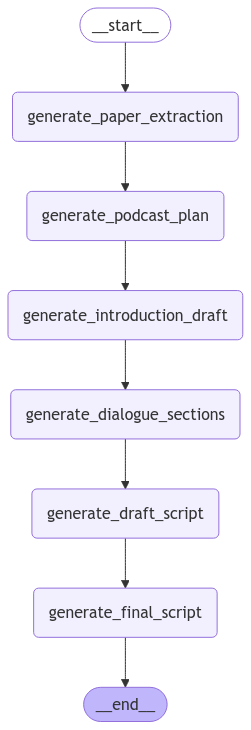

In [21]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [22]:
!pip install pypdf

In [23]:
docs = load_pdf_documents("https://arxiv.org/pdf/2409.09030")

In [24]:
docs

[Document(metadata={'source': '/tmp/e796a14b-96c5-4083-bc0e-c072ad2ba901.pdf2kg7v61y', 'page': 0}, page_content='Agents in Software Engineering: Survey, Landscape, and Vision\nYanlin Wang1, Wanjun Zhong1, Yanxian Huang1∗, Ensheng Shi2, Min Yang3,\nJiachi Chen1, Hui Li4, Yuchi Ma5, Qianxiang Wang5, Zibin Zheng1\n1Sun Yat-sen University,2Xi’an Jiaotong University\n3Shenzhen Institute of Advanced Technology, Chinese Academy of Sciences\n4Xiamen University, 5Huawei Cloud Computing Technologies Co., Ltd.\nAbstract\nIn recent years, Large Language Models\n(LLMs) have achieved remarkable success and\nhave been widely used in various downstream\ntasks, especially in the tasks of the software en-\ngineering (SE) field. We find that many studies\ncombining LLMs with SE have employed the\nconcept of agents either explicitly or implicitly.\nHowever, there is a lack of an in-depth survey\nto sort out the development context of existing\nworks, analyze how existing works combine\nthe LLM-based agent

In [25]:
inputs = {
    "docs": docs,
    "main_topic": "Agents in Software Engineering: Survey, Landscape, and Vision",
    "lang": "en"
  }

result = app.invoke(inputs)

STEP 1: {'title': 'Agents in Software Engineering: Survey, Landscape, and Vision', 'abstract': 'This paper presents the first comprehensive survey of studies that integrate Large Language Models (LLMs) with software engineering (SE) tasks. It identifies key challenges and potential future research avenues in this emerging field. A framework for LLM-based agents in SE is proposed, consisting of three essential modules: perception, memory, and action. The study highlights the limited research on sophisticated SE techniques in agent systems and emphasizes the need for improved software package management techniques to enhance compatibility and system integrity. By analyzing existing works, this research aims to provide clarity on the development context and optimization strategies involving LLM-based agent technologies in SE.', 'sections': {'Introduction': 'The introduction discusses the rapid advancements of LLMs in various tasks, particularly within software engineering, and highlights 

In [26]:
result

{'docs': [Document(metadata={'source': '/tmp/e796a14b-96c5-4083-bc0e-c072ad2ba901.pdf2kg7v61y', 'page': 0}, page_content='Agents in Software Engineering: Survey, Landscape, and Vision\nYanlin Wang1, Wanjun Zhong1, Yanxian Huang1∗, Ensheng Shi2, Min Yang3,\nJiachi Chen1, Hui Li4, Yuchi Ma5, Qianxiang Wang5, Zibin Zheng1\n1Sun Yat-sen University,2Xi’an Jiaotong University\n3Shenzhen Institute of Advanced Technology, Chinese Academy of Sciences\n4Xiamen University, 5Huawei Cloud Computing Technologies Co., Ltd.\nAbstract\nIn recent years, Large Language Models\n(LLMs) have achieved remarkable success and\nhave been widely used in various downstream\ntasks, especially in the tasks of the software en-\ngineering (SE) field. We find that many studies\ncombining LLMs with SE have employed the\nconcept of agents either explicitly or implicitly.\nHowever, there is a lack of an in-depth survey\nto sort out the development context of existing\nworks, analyze how existing works combine\nthe LLM-ba